In [ ]:
123:prealable essentielle: data cleaning , data preprocessing
1 reduction de dimension pca
2clustering
3 evaluating models
4 profiling
5 conclusion

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [24]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

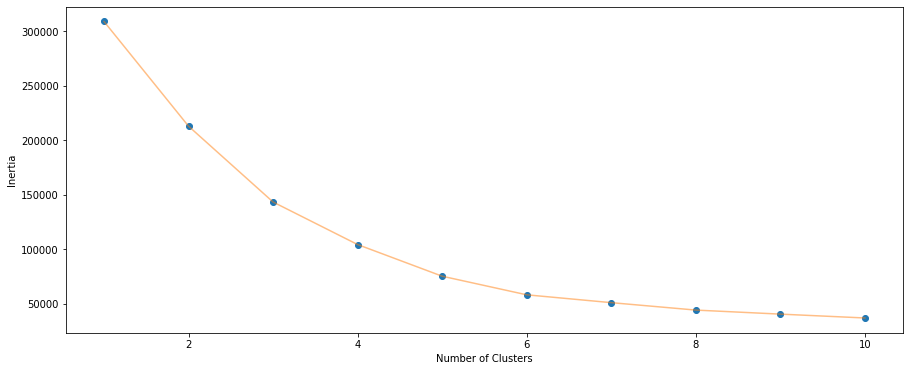

In [4]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

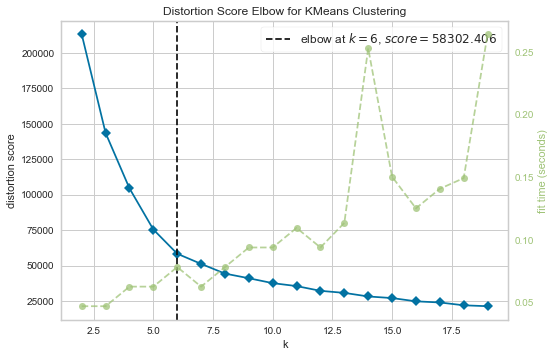

6

In [5]:
from yellowbrick.cluster import KElbowVisualizer
knn = KMeans()
elbow = KElbowVisualizer(knn, k=(2, 20))
elbow.fit(X3)
elbow.show()
elbow.elbow_value_ # 6

In [6]:
# STANDARDIZATION
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0, 1))
X4= sc.fit_transform(X3)
X4[0:10]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ]])

In [20]:
X4

,Spending Score (1-100),Annual Income (k$),cluster_no
Age,,,
18,4,205,1
19,8,456,2
20,5,208,1
21,4,194,1
22,3,94,4
23,6,249,1
24,4,157,1
25,3,173,1
26,2,116,4


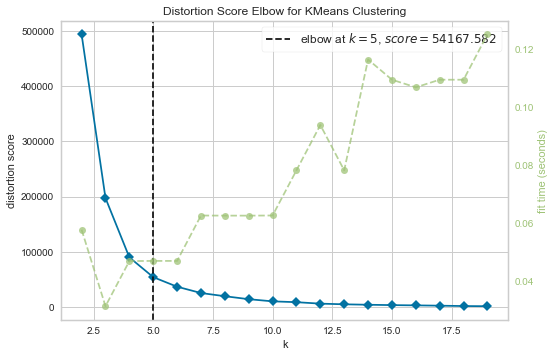

5

In [8]:
#CLUSTERING
#Lets find the optimum number of clusters
from yellowbrick.cluster import KElbowVisualizer
knn = KMeans()
elbow = KElbowVisualizer(knn, k=(2, 20))
elbow.fit(X4)
elbow.show()
elbow.elbow_value_ # 6

In [9]:
knn = KMeans(n_clusters=elbow.elbow_value_).fit(X4)
clusters = knn.labels_

X4 = df.groupby('Age').agg({ #'InvoiceDate': lambda x: (today_date-x.max()).days,
                             'Spending Score (1-100)': lambda y: y.nunique(),
                             'Annual Income (k$)': lambda z: z.sum()})

pd.DataFrame({"Age": X4.index, "Clusters": clusters})

X4["cluster_no"] = clusters
X4["cluster_no"] = X4["cluster_no"] + 1
X4.head()

,Spending Score (1-100),Annual Income (k$),cluster_no
Age,,,
18,4,205,1
19,8,456,2
20,5,208,1
21,4,194,1
22,3,94,4


In [12]:
 #Récupération des indices des colonnes 
ls_features = list(X4.keys())
ls_features

['Spending Score (1-100)', 'Annual Income (k$)', 'cluster_no']

# Classification Ascendente hierarchique

In [14]:
#Insérez votre code ici
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)

# Apprentissage des données 
cluster.fit(X4[ls_features])

# Calcul des labels du data set
labels = cluster.labels_

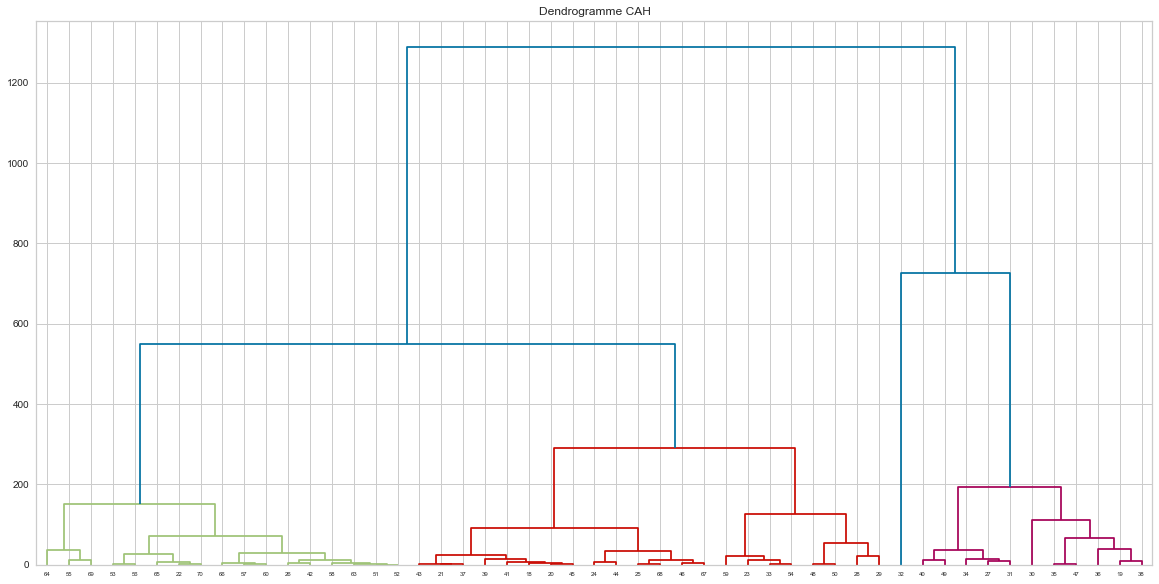

In [19]:
# Importation des packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(X4, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = X4.index, leaf_rotation = 0., color_threshold = 290)
plt.show()

In [ ]:
#PCA REDUCTION
La réduction de dimensionnalité est le processus de réduction du nombre de variables aléatoires considérées, 
en obtenant un ensemble de variables principales.

In [ ]:
#L'analyse en composantes principales (ACP) est une technique permettant de réduire la dimensionnalité 
#de tels ensembles de données, 
#augmentant l'interprétabilité tout en minimisant la perte d'informations.

In [26]:

df = pd.read_csv('Mall_Customers.csv')
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [35]:
#df1=  df.drop('Age', 'Gender',  axis=1)
df1= df.drop(columns=['Age', 'Gender', 'CustomerID'], axis= 1)
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [56]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [38]:

scaler = StandardScaler()
scaler.fit(df1)
scaled_ds = pd.DataFrame(scaler.transform(df1))
print("All features are now scaled")

All features are now scaled


In [43]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=2)
pca.fit(df1)
PCA_ds = pd.DataFrame(pca.transform(df1), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,200.0,-3.979039e-15,26.299327,-54.564848,-16.976620,-0.210625,16.685994,82.356255
col2,200.0,-9.059420e-16,25.788277,-54.440921,-16.143991,1.571932,17.533679,57.967295


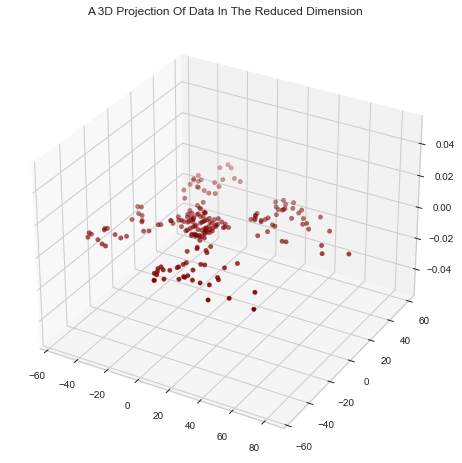

In [44]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
#clustering
Now that I have reduced the attributes to two dimensions, I will be performing clustering via Agglomerative clustering. 
Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

In [46]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= yhat_AC

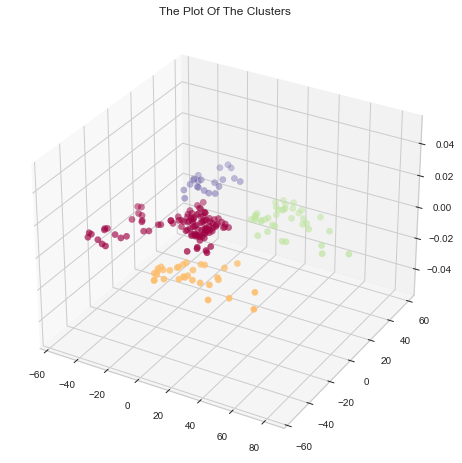

In [50]:
#Plotting the clusters
from matplotlib import cm
fig = plt.figure(figsize=(10,8))
cmap = plt.cm.Spectral
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
# Evaluate models

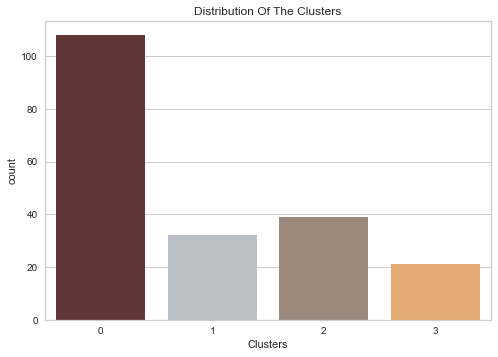

In [51]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
The clusters seem to be fairly distributed.

In [54]:
df1.dtypes

Annual Income (k$)        int64
Spending Score (1-100)    int64
Clusters                  int64
dtype: object

AttributeError: 'PathCollection' object has no property 'df1'

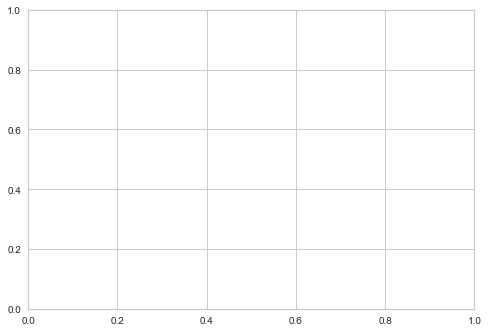

In [58]:
from mpl_toolkits.mplot3d import axes3d
pl = sns.scatterplot(df1 = df1, x=df1["Annual Income (k$)"], y=df1["Spending Score (1-100)"],hue=df1["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()
#pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
#pl.set_title("Cluster's Profile Based On Income And Spending")
#plt.legend()
#plt.show()


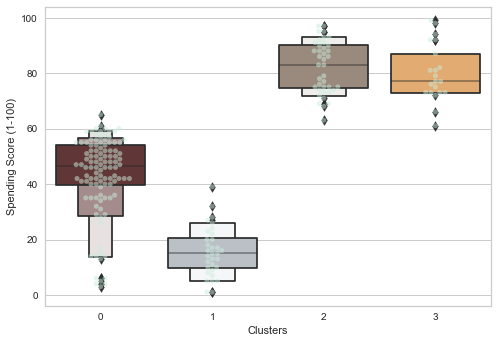

In [59]:

plt.figure()
pl=sns.swarmplot(x=df1["Clusters"], y=df1["Spending Score (1-100)"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df1["Clusters"], y=df1["Spending Score (1-100)"], palette=pal)
plt.show()

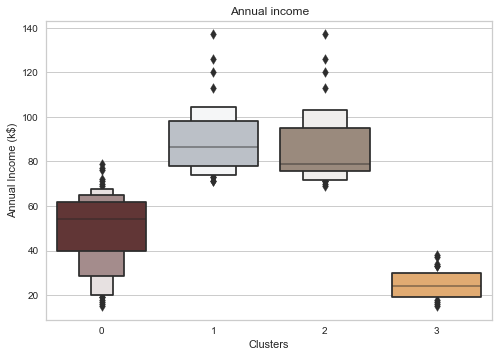

In [60]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df1["Annual Income (k$)"],x=df1["Clusters"], palette= pal)
pl.set_title("Annual income")
plt.show()

# profiling

<Figure size 576x396 with 0 Axes>

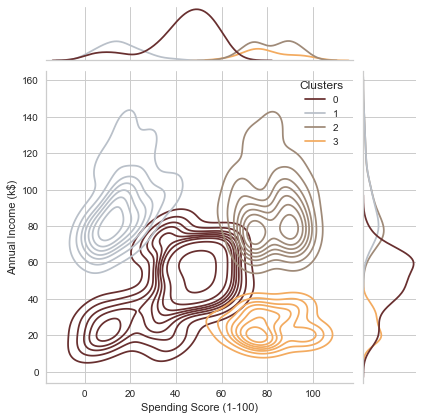

In [61]:
Personal = [ "Spending Score (1-100)"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df1[i], y=df1["Annual Income (k$)"], hue =df1["Clusters"], kind="kde", palette=pal)
    plt.show()

In [ ]:
The following information can be deduced about the customers in different clusters.
about cluster 0: 

In [ ]:
n this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering.
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spendin.
This can be used in planning better marketing strategies.

In [ ]:
#label encoder les variables categ aussi parfois transformer certaines variables numeriques comme heure 
#en object pour ensuite utiliser label encoder

In [ ]:
In this section, I will be preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")